In [2]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [53]:
# Read age data from 
hosp_ad_raw = pd.read_excel('Data/hosp_ad_data.xlsx')

In [153]:
# list of LGAs and PHN codes
NWM_LGA = [21180, 21890, 23110, 23270, '24130a', 24330, 24600, 24650,
           25060, '25150a', 25250, 27260, 27350, 'PHN201']

In [146]:
# Find the highest diagnosis for hospital adminssions
hosp_ad = hosp_ad_raw.loc[:, hosp_ad_raw.columns.str.startswith('Admissions')] #select for count of admissions 
hosp_ad

,"Admissions for infectious and parasitic diseases, 0 to 14 years\n- Public hospitals","Admissions for infectious and parasitic diseases, 15 to 24 years\n- Public hospitals","Admissions for all cancers, 0 to 14 years\n- Public hospitals","Admissions for all cancers, 15 to 24 years\n- Public hospitals","Admissions for endocrine, nutritional and metabolic diseases, 0 to 14 years \n- Public hospitals","Admissions for endocrine, nutritional and metabolic diseases, 15 to 24 years \n- Public hospitals","Admissions for mental health related conditions, 0 to 14 years \n- Public hospitals","Admissions for mental health related conditions, 15 to 24 years \n- Public hospitals","Admissions for nervous system diseases, \n0 to 14 years \n- Public hospitals","Admissions for nervous system diseases, \n15 to 24 years \n- Public hospitals",...,"Admissions for skin and subcutaneous tissue diseases, 0 to 14 years \n- Public hospitals","Admissions for skin and subcutaneous tissue diseases, 15 to 24 years \n- Public hospitals","Admissions for musculoskeletal system and connective tissue diseases, 0 to 14 years \n- Public hospitals","Admissions for musculoskeletal system and connective tissue diseases, 15 to 24 years \n- Public hospitals","Admissions for genitourinary system diseases, 0 to 14 years \n- Public hospitals","Admissions for genitourinary system diseases, 15 to 24 years \n- Public hospitals","Admissions for congenital malformations, deformations and chromosomal abnormalities, 0 to 14 years \n- Public hospitals","Admissions for congenital malformations, deformations and chromosomal abnormalities, 15 to 24 years \n- Public hospitals","Admissions for injury, poisoning and other external causes, 0 to 14 years \n- Public hospitals","Admissions for injury, poisoning and other external causes, 15 to 24 years \n- Public hospitals"
0,1206.209533,626.175392,582.006828,265.341679,289.168563,280.01138,166.168563,1421.343955,970.186772,386.671978,...,504.01138,559.18222,534.674254,446.510242,643.177668,966.681082,960.690186,80.501138,2335.378096,2783.535279
1,37.984336,15.998157,39.998157,8.998157,7,5,5.995393,58.992629,62.985257,10.997236,...,15.996314,15.99355,24.99355,53.969593,14.997236,43.994471,37.9871,5.997236,80.973279,139.965907
2,29.19852,16.773655,16.490953,#,#,#,#,34.840616,15.718281,16.197751,...,8.849064,16.805056,9.443318,5.166233,15.952607,17.00045,16.897344,5.01475,44.690006,54.094392
3,83.299338,36.618733,37.989972,#,19.37124,14.123747,16.18562,74.804352,38.680606,32.061873,...,22.123747,35.928099,48.37124,19.247493,28.18562,47.804352,61.680606,#,139.794324,129.536804
4,243.473062,76.495139,67.371904,44.518506,58.156318,38.439811,12.256475,118.730155,160.510542,58.33822,...,94.033484,117.992119,64.095983,74.108953,93.305895,124.192858,145.011309,14.130491,358.982602,331.142931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,1002,298,67,66,128,207,82,823,222,160,...,720,430,203,213,273,482,205,15,1431,1860
668,296,143,36,37,54,29,43,334,113,96,...,183,174,62,102,113,221,100,10,685,806
669,706,155,31,29,74,178,39,489,109,64,...,537,256,141,111,160,261,105,5,746,1054
670,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [180]:
# parsing column titles to list format
column_titles = list(hosp_ad.columns)
column_titles = [w.replace("Admissions for " , "") for w in column_titles]

column_titles = [w.replace("\n", "") for w in column_titles]
column_titles = [w.replace("-", "") for w in column_titles]
column_titles = [w.replace("  ", " ") for w in column_titles]
column_titles = [w.replace(", 0 to 14 years Public hospitals" , "") for w in column_titles]
column_titles = [w.replace(", 15 to 24 years Public hospitals" , "") for w in column_titles]

column_titles = column_titles[::2]

# selecting PHN (north western melbourne)
hosp_NWM = hosp_ad.loc[144,:].values.tolist()

# splice data for 0-14 year olds
hosp_0_14 = hosp_NWM[::2] #0-14

#splice data for 15-24 year olds
hosp_15_24 = hosp_NWM[1::2]

d = {
    '0-14': hosp_0_14, 
    '15-24': hosp_15_24
}
hosp_ad_data = pd.DataFrame(data = d)
hosp_ad_data.index = column_titles
hosp_ad_data['Total'] = hosp_ad_data.sum(axis = 1, numeric_only= True)


hosp_ad_data['0-14'].nlargest(n=5).index
hosp_ad_data['15-24'].nlargest(n=5).index
hosp_ad_data['Total'].nlargest(n=5).index


Index(['injury, poisoning and other external causes',
       'respiratory system diseases', 'digestive system diseases',
       'nervous system diseases', 'infectious and parasitic diseases'],
      dtype='object')

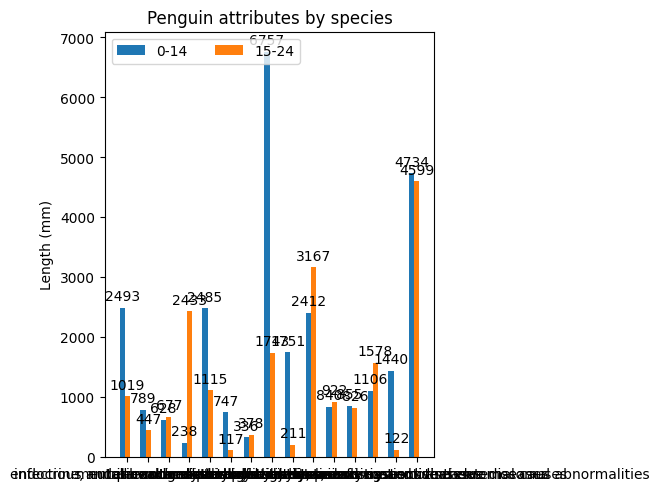

In [165]:
x = np.arange(len(column_titles))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in hosp_ad_info.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Length (mm)')
ax.set_title('Penguin attributes by species')
ax.set_xticks(x + width, column_titles)
ax.legend(loc='upper left', ncols=3)
#ax.set_ylim(0, 250)

plt.show()